In [34]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("datasets/reviews.csv")

df.head(5)

,reviews,label
0,kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...,1.0
1,"Jahitannya sih rapi,cuman ada benang yang ikut...",0.0
2,Sesuai harga. Agak tipis tapi masih oke kok. W...,0.0
3,"Wah gila sihhh sebagus itu, se worth it, se l...",1.0
4,Kain nya bagus halus \nTapi kok di bukak koto...,0.0


In [7]:
df['label'].value_counts()

label
0.0    446
1.0    385
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['label'], random_state=0)

In [12]:
X_train.shape, X_test.shape

((623,), (208,))

In [16]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2023-05-22 15:25:41.834649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-22 15:25:41.835484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-22 15:25:41.835725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-05-22 15:25:41.836437: I tensorflow/core/

2023-05-22 15:25:54.536934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.


In [17]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

outputs

2023-05-22 15:25:55.966406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-05-22 15:25:56.000538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-05-22 15:25:56.915926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-05-22 1

{'pooled_output': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_3')>,
 'sequence_output': <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_3')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32

In [18]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [19]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [20]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [21]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-05-22 16:17:31.644571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3}}]]
2023-05-22 16:17:31.760412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4}}]]
2023

2023-05-22 16:17:31.768403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_107' with dtype float and shape [3072]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_107}}]]
2023-05-22 16:17:31.768489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_109' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_109}}]]

2023-05-22 16:17:31.771695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_156' with dtype float
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_156}}]]
2023-05-22 16:17:31.771780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_157' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_157}}]]
2023-05-22 16:17

2023-05-22 16:17:33.851020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_823' with dtype float and shape [768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_823}}]]
2023-05-22 16:17:33.851206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_824' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_824}}]]


2023-05-22 16:17:36.369816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-05-22 16:17:36.370048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-05-22 16:17:36.370222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

2023-05-22 16:17:36.399751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_295' with dtype float and shape [?,?,1]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_295}}]]
2023-05-22 16:17:36.399841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_296' with dtype float and shape [768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_296}}]]
2023-05-22 16:17:36.399932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO

2023-05-22 16:17:36.645076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_787' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_787}}]]
2023-05-22 16:17:36.645170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_788' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_788}}]]
2023-05-22 16:17:36.645263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBU

2023-05-22 16:17:37.418852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-05-22 16:17:37.419006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-05-22 16:17:37.419139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

20/20 [==============================] - 723s 26s/step - loss: 0.7476 - accuracy: 0.5265 - precision: 0.4930 - recall: 0.4811
Epoch 2/10
20/20 [==============================] - 566s 28s/step - loss: 0.7130 - accuracy: 0.5040 - precision: 0.4612 - recall: 0.3677
Epoch 3/10
20/20 [==============================] - 514s 26s/step - loss: 0.6923 - accuracy: 0.5345 - precision: 0.5020 - recall: 0.4227
Epoch 4/10
20/20 [==============================] - 533s 27s/step - loss: 0.7087 - accuracy: 0.5056 - precision: 0.4608 - recall: 0.3436
Epoch 5/10
20/20 [==============================] - 555s 28s/step - loss: 0.7037 - accuracy: 0.5281 - precision: 0.4925 - recall: 0.3402
Epoch 6/10
20/20 [==============================] - 545s 27s/step - loss: 0.7041 - accuracy: 0.5393 - precision: 0.5076 - recall: 0.4605
Epoch 7/10
20/20 [==============================] - 535s 27s/step - loss: 0.6980 - accuracy: 0.5474 - precision: 0.5193 - recall: 0.4158
Epoch 8/10
20/20 [==============================] - 

In [22]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

7/7 [==============================] - 211s 28s/step


array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

NameError: name 'plt' is not defined

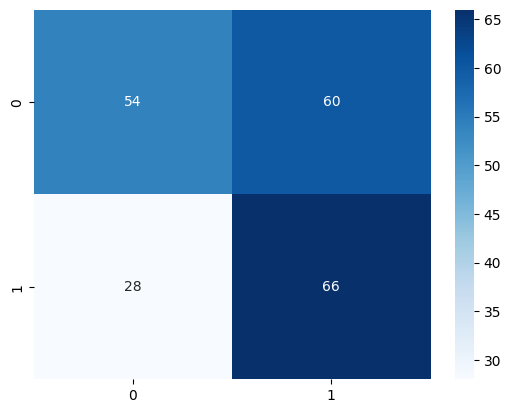

In [35]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Bert Classification')
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted, average='weighted')
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')

In [29]:
accuracy, f1, precision, recall

(0.5769230769230769,
 0.5731554160125588,
 0.5976503171625123,
 0.5769230769230769)

In [ ]:
plt.plot(['Accuracy', 'F1', 'Recall', 'Precission'], [accuracy, f1, recall, precission])
plt.title('Time Series Graph')
plt.legend()
plt.show()